# Snow Data

Tool to import archived snow data and manipulate it using python pandas. Eventually
to plot with plotlinkedinly/dash app of some kind.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from dash import Dash, html, dcc, Input, Output, callback

from datetime import datetime

df = pd.read_csv('/home/fanslow/Work/plotly_fuckery/snow/SW_DailyArchive.csv',index_col=[0],parse_dates=[0]) #Here the [0] tells fxn to parse first column
len(df)
df.describe()

,1A02P McBride Upper,1A03P Barkerville,1A05P Longworth Upper,1A12P Kaza Lake,1A14P Hedrick Lake,1A15P Knudsen Lake,1A17P Revolution Creek,1A19P Dome Mountain,1B01P Mount Wells,1B02P Tahtsa Lake,...,4C11P Bluff Creek,4C20P Sierra Climate,4C21P Two Island Climate,4C22P Kiwigana Climate,4D08P Forrest-Kerr Creek,4D10P Tumeka Creek,4D11P Kinaskan Lake,4D14P Wade Lake,4D16P Forrest Kerr Mid Elevation Snow,4D17P Forrest Kerr High Elevation Snow
count,9297.000000,17055.000000,2555.000000,2507.000000,8614.000000,2741.000000,14110.000000,6444.000000,11135.000000,12313.000000,...,2869.000000,1753.000000,1684.000000,1454.000000,3789.000000,8852.000000,9982.000000,6648.00000,2710.000000,2741.000000
mean,129.774121,124.221812,392.271233,122.575588,313.242860,321.738417,335.846704,340.697703,237.415806,512.675627,...,72.539212,30.166001,38.849762,27.231774,176.509633,228.661319,133.428171,139.51414,409.763100,632.003283
std,192.418406,145.284426,393.550451,132.297578,358.147732,357.635361,366.745955,339.659365,245.287963,547.575450,...,108.974542,42.590815,50.615587,42.494167,208.875717,232.098169,159.810826,147.49929,395.192021,541.946884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,135.000000
50%,0.000000,56.000000,306.000000,70.000000,176.000000,224.000000,203.000000,261.000000,171.000000,351.000000,...,0.000000,0.000000,13.000000,0.000000,52.000000,174.000000,56.000000,94.00000,346.500000,575.000000
75%,252.000000,236.000000,685.000000,243.000000,573.750000,504.000000,608.000000,608.000000,437.000000,955.000000,...,132.000000,62.000000,71.000000,36.000000,344.000000,402.000000,247.000000,259.00000,670.750000,948.000000
max,754.000000,556.000000,1412.000000,425.000000,1329.000000,1446.000000,1379.000000,1223.000000,957.000000,2360.000000,...,369.000000,167.000000,199.000000,162.000000,822.000000,881.000000,668.000000,558.00000,1335.000000,2158.000000


<Axes: xlabel='DATE(UTC)'>

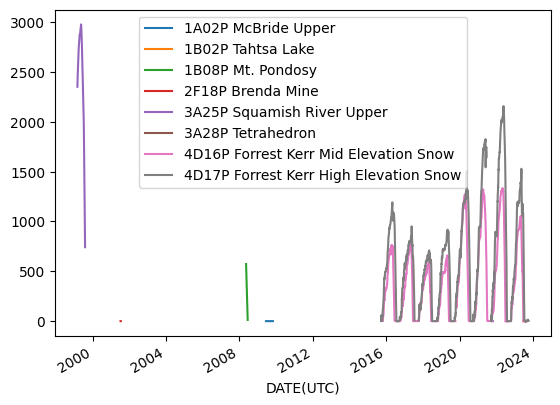

In [52]:

#Deal with the non-daily observations. Most are on the 16:00, some are on the 00:00 and others are on the even hour.

plt.close("all")
junkdf = df[df.index.strftime('%H') == '00'].dropna(axis=1,how='all')
junkdf.plot()
#df[junkdf.columns].plot();

Looks like there are six stations that have data on the even hour at some point in their record. These are '1A02P McBride Upper', '1B02P Tahtsa Lake', '1B08P Mt. Pondosy', '2F18P Brenda Mine', '3A25P Squamish River Upper', '3A28P Tetrahedron'

Additionally, the stations '4D16P Forrest Kerr Mid Elevation Snow', '4D17P Forrest Kerr High Elevation Snow' have data on the 00:00. These also appear not to have data on the 16:00. So, perhaps we can effectively 

In [16]:
#convert dates/times to timestamp before melting
def datetimepandas(timestring):
    return datetime.strptime(timestring,'%Y-%m-%d %H:%M')
df['DATE(UTC)']=df['DATE(UTC)'].apply(datetimepandas)
#Melt the dataframe into a long format for plotting flexibility.
meltdf = pd.melt(df,df.columns[0],df.columns[1:],var_name='Snow_Survey_Station',value_name='Snow_Amount')

#Get the min and mad date and years
mindate = min(df['DATE(UTC)'])
minyear = datetime.strftime(mindate,'%Y')
maxdate = max(df['DATE(UTC)'])
maxyear = datetime.strftime(maxdate,'%Y')
print (mindate,maxdate,minyear,maxyear)
df.tail()


KeyError: 'DATE(UTC)'

First, lets make a multi-year plot of the data for a given station along an axis that is the days of the water year.

In [6]:
#Make a column that is the days of the water year. Convert date to julian day
df['DATE(UTC)'].unique()

<DatetimeArray>
['1967-10-01 16:00:00', '1967-10-02 16:00:00', '1967-10-03 16:00:00',
 '1967-10-04 16:00:00', '1967-10-05 16:00:00', '1967-10-06 16:00:00',
 '1967-10-07 16:00:00', '1967-10-08 16:00:00', '1967-10-09 16:00:00',
 '1967-10-10 16:00:00',
 ...
 '2023-09-26 00:00:00', '2023-09-26 16:00:00', '2023-09-27 00:00:00',
 '2023-09-27 16:00:00', '2023-09-28 00:00:00', '2023-09-28 16:00:00',
 '2023-09-29 00:00:00', '2023-09-29 16:00:00', '2023-09-30 00:00:00',
 '2023-09-30 16:00:00']
Length: 30335, dtype: datetime64[ns]

In [5]:
app = Dash(__name__)
app.layout = html.Div([
    dcc.Dropdown(
        df.columns[1:],
        id='snow-station-name',
        multi=True
    )
])    
if __name__ == '__main__':
    app.run(debug=True,port=8049)
df.columns[1:]

Index(['1A02P McBride Upper', '1A03P Barkerville', '1A05P Longworth Upper',
       '1A12P Kaza Lake', '1A14P Hedrick Lake', '1A15P Knudsen Lake',
       '1A17P Revolution Creek', '1A19P Dome Mountain', '1B01P Mount Wells',
       '1B02P Tahtsa Lake',
       ...
       '4C11P Bluff Creek', '4C20P Sierra Climate', '4C21P Two Island Climate',
       '4C22P Kiwigana Climate', '4D08P Forrest-Kerr Creek',
       '4D10P Tumeka Creek', '4D11P Kinaskan Lake', '4D14P Wade Lake',
       '4D16P Forrest Kerr Mid Elevation Snow',
       '4D17P Forrest Kerr High Elevation Snow'],
      dtype='object', length=118)

In [62]:
meltdf.dtypes

DATE(UTC)              datetime64[ns]
Snow_Survey_Station            object
Snow_Amount                   float64
dtype: object

In [63]:
#lets extract the year, month and day from the date column.

